In [ ]:
# Developing Algorithmic Trading Strategies Project
Data Science Practicum I
MSDS692, John Holub

EDA to determine up and down market changepoint dates using fbprophet and stocker. These dates will be used to evaluate system viability in up/down market conditions.

Install and update libaries

In [ ]:
pip install -U quandl numpy pandas fbprophet matplotlib pytrends pystan plotly yfinance

In [ ]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
import yfinance as yf 
%matplotlib inline

In [ ]:
from stocker import Stocker

In [20]:
# Use this code for Quandl WIKI stocks (no ETFs)
tesla = Stocker(ticker='TSLA')

TSLA Stocker Initialized. Data covers 2010-06-29 00:00:00 to 2018-03-27 00:00:00.


In [42]:
# Use this code for yahoo stocks and ETFs, must supply dates
SPY = yf.download('SPY','2009-01-01','2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [26]:
stock_history = tesla.stock
stock_history.head(10)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,2010-06-29,19.0000,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.0000,25.0000,17.54,23.89,18766300.0,2010-06-29,23.89,4.8900
1,2010-06-30,25.7900,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.7900,30.4192,23.30,23.83,17187100.0,2010-06-30,23.83,-1.9600
2,2010-07-01,25.0000,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.0000,25.9200,20.27,21.96,8218800.0,2010-07-01,21.96,-3.0400
3,2010-07-02,23.0000,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.0000,23.1000,18.71,19.20,5139800.0,2010-07-02,19.20,-3.8000
4,2010-07-06,20.0000,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.0000,20.0000,15.83,16.11,6866900.0,2010-07-06,16.11,-3.8900
5,2010-07-07,16.4000,16.6300,14.98,15.80,6921700.0,0.0,1.0,16.4000,16.6300,14.98,15.80,6921700.0,2010-07-07,15.80,-0.6000
6,2010-07-08,16.1400,17.5200,15.57,17.46,7711400.0,0.0,1.0,16.1400,17.5200,15.57,17.46,7711400.0,2010-07-08,17.46,1.3200
7,2010-07-09,17.5800,17.9000,16.55,17.40,4050600.0,0.0,1.0,17.5800,17.9000,16.55,17.40,4050600.0,2010-07-09,17.40,-0.1800
8,2010-07-12,17.9500,18.0700,17.00,17.05,2202500.0,0.0,1.0,17.9500,18.0700,17.00,17.05,2202500.0,2010-07-12,17.05,-0.9000
9,2010-07-13,17.3938,18.6400,16.90,18.14,2680100.0,0.0,1.0,17.3938,18.6400,16.90,18.14,2680100.0,2010-07-13,18.14,0.7462


fbprophet determines significant changedates which can be used to test system performance in previous up/down markets


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
217 2016-02-08      147.99  7.293481
169 2015-11-27      231.61 -3.517562
265 2016-04-18      253.88 -3.505999
313 2016-06-24      193.15  2.392548
144 2015-10-22      211.72  1.987002


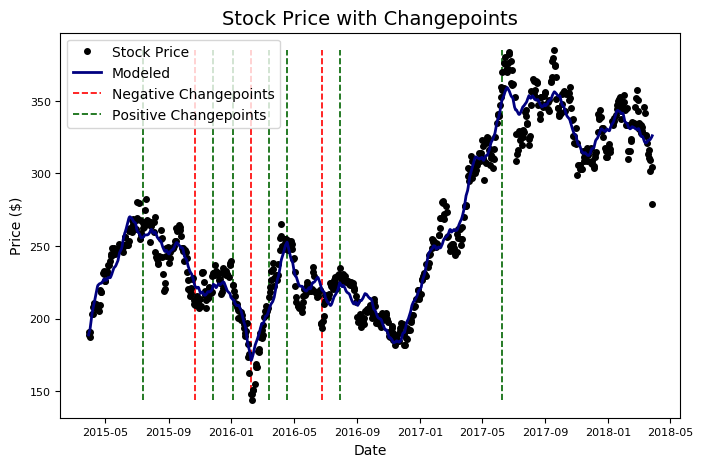

In [39]:
tesla.changepoint_date_analysis()